In [ ]:
from google.colab import drive

# Mount Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/FDAResearch/Datasets/Prod_Review

/content/drive/MyDrive/FDAResearch/Datasets/Prod_Review


In [ ]:
# STEP 1: INSTALL REQUIRED PACKAGES
!pip install wordcloud textblob sentence-transformers scikit-learn seaborn openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink-

In [ ]:
# STEP 3: IMPORT LIBRARIES
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_excel('snapchat_reviews.xlsx')  # Ensure file name matches upload

In [ ]:
df_filtered = df[df['Rating'].isin([1, 2, 3])].dropna(subset=['Review']).copy()

In [ ]:
# STEP 5: CLEAN TEXT
stopwords = set([
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any",
    "are", "as", "at", "be", "because", "been", "before", "being", "below", "between",
    "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each",
    "few", "for", "from", "further", "had", "has", "have", "having", "he", "her", "here",
    "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "it",
    "its", "itself", "just", "me", "more", "most", "my", "myself", "no", "nor", "not", "now",
    "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over",
    "own", "s", "same", "she", "should", "so", "some", "such", "t", "than", "that", "the", "their",
    "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through",
    "to", "too", "under", "until", "up", "very", "was", "we", "were", "what", "when", "where",
    "which", "while", "who", "whom", "why", "will", "with", "you", "your", "yours", "yourself",
    "yourselves"
])

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return ' '.join([word for word in text.split() if word not in stopwords])

In [ ]:
df_filtered['Cleaned_Review'] = df_filtered['Review'].apply(clean_text)

In [ ]:
# STEP 6: WORD FREQUENCY & WORDCLOUD
all_words = ' '.join(df_filtered['Cleaned_Review'])
word_freq = Counter(all_words.split())
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

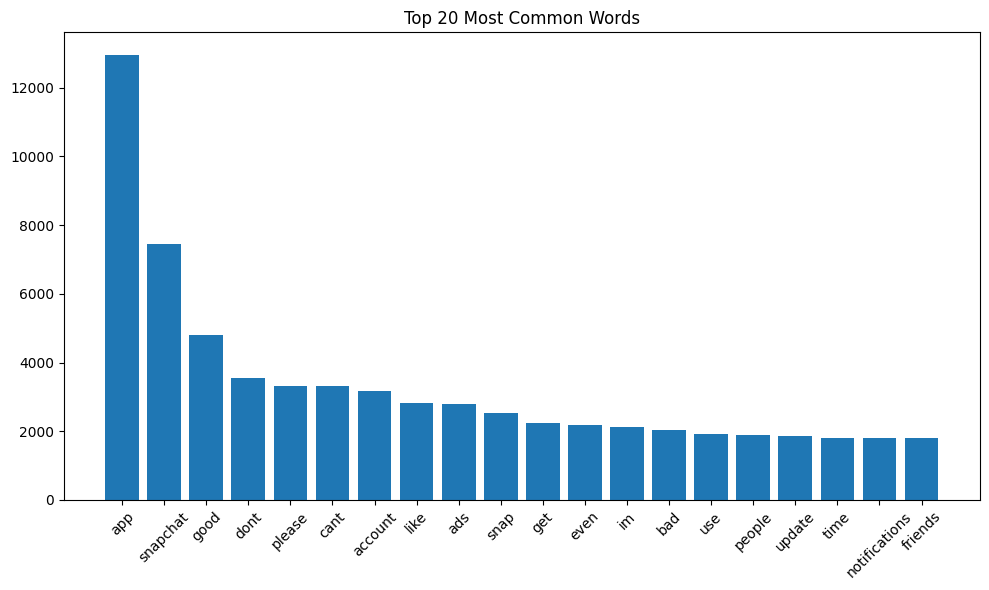

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

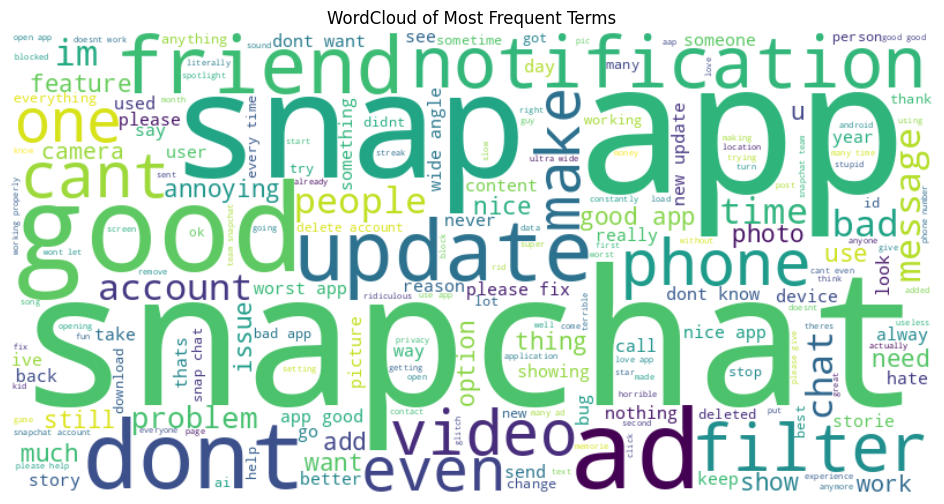

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Most Frequent Terms")
plt.show()


In [ ]:
# STEP 7: TOPIC MODELING (LDA)
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df_filtered['Cleaned_Review'])

In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
    print()

Topic 1:
['block', 'angle', 'video', 'content', 'wide', 'android', 'snapchat', 'app', 'camera', 'bad']

Topic 2:
['people', 'im', 'fix', 'open', 'update', 'snapchat', 'like', 'notifications', 'dont', 'app']

Topic 3:
['banned', 'delete', 'phone', 'help', 'problem', 'working', 'nice', 'app', 'snapchat', 'account']

Topic 4:
['ad', 'annoying', 'snap', 'remove', 'friends', 'app', 'chat', 'ai', 'snapchat', 'ads']

Topic 5:
['nhi', 'ho', 'aap', 'time', 'filter', 'download', 'worst', 'hai', 'app', 'good']



In [ ]:
# STEP 8: SENTIMENT ANALYSIS
df_filtered['Polarity'] = df_filtered['Cleaned_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
def categorize_sentiment(score):
    if score < -0.1:
        return 'Negative'
    elif score > 0.1:
        return 'Positive'
    else:
        return 'Neutral'

In [ ]:
df_filtered['Sentiment'] = df_filtered['Polarity'].apply(categorize_sentiment)

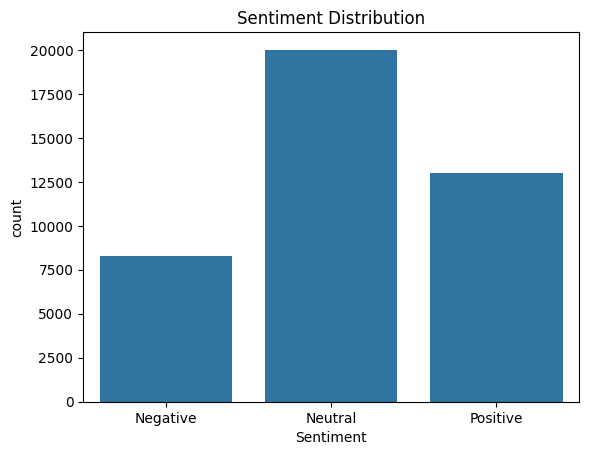

In [ ]:
sns.countplot(data=df_filtered, x='Sentiment', order=['Negative', 'Neutral', 'Positive'])
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
# STEP 9: CLUSTERING REVIEWS
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df_filtered['Cleaned_Review'].tolist(), show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1291 [00:00<?, ?it/s]

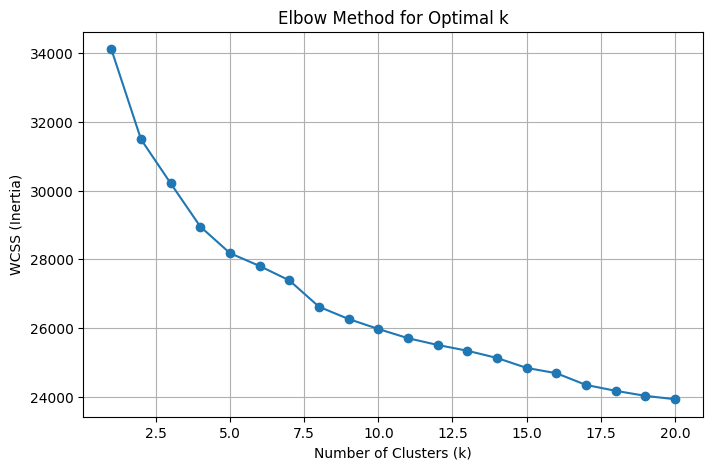

In [ ]:
# STEP: Elbow Method to Find Optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 21)  # Trying cluster sizes from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# STEP: Silhouette Score for Validation
from sklearn.metrics import silhouette_score

print("Silhouette Scores for k = 2 to 10:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    print(f"  k = {k}: Silhouette Score = {score:.4f}")

Silhouette Scores for k = 2 to 10:
  k = 2: Silhouette Score = 0.0843
  k = 3: Silhouette Score = 0.0811
  k = 4: Silhouette Score = 0.0784
  k = 5: Silhouette Score = 0.0836
  k = 6: Silhouette Score = 0.0823
  k = 7: Silhouette Score = 0.0851
  k = 8: Silhouette Score = 0.0947
  k = 9: Silhouette Score = 0.0966
  k = 10: Silhouette Score = 0.0924


In [ ]:
# # STEP: (Optional) Visualize Clusters using UMAP
# !pip install umap-learn

# import umap.umap_ as umap

# # Reduce dimensionality for visualization
# reducer = umap.UMAP(random_state=42)
# embedding_2d = reducer.fit_transform(embeddings)

# # Set to best k value after testing above (replace 5 with optimal)
# best_k = 5
# kmeans = KMeans(n_clusters=best_k, random_state=0)
# labels = kmeans.fit_predict(embeddings)

# plt.figure(figsize=(10, 6))
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels, cmap='tab10')
# plt.title(f"UMAP Projection with k = {best_k}")
# plt.colorbar(label='Cluster')
# plt.show()

In [ ]:
best_k = 5
num_clusters = best_k

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df_filtered['Cluster'] = kmeans.fit_predict(embeddings)

In [ ]:
for i in range(num_clusters):
    print(f"\n--- Cluster {i} ---")
    print(df_filtered[df_filtered['Cluster'] == i]['Review'].head(3).to_string(index=False))


--- Cluster 0 ---
    Too many ads
A lot of glitchs
         ghatiya

--- Cluster 1 ---
this app is not a good choice for every one 😞😞😞...
                           Wow this app is so cool
GARBAGE APP. POSTING A CHEESE BURGER IS FLAGGED...

--- Cluster 2 ---
                               zoom is not working
Child porngraphy sharing app specifically creat...
Is it only me who is facing the issue regarding...

--- Cluster 3 ---
not good👍
     Good
   good 👍

--- Cluster 4 ---
               Snapchat is not working without VPN
I'm facing some problems I cannot send snaps an...
it bugged in most bad time ever and I can't con...


In [ ]:
# STEP 10: EXPORT TO CSV & DOWNLOAD
df_filtered.to_csv('snapchat_negative_reviews.csv', index=False)

In [ ]:
from google.colab import files
files.download('snapchat_negative_reviews.csv')  # Download the final dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>